# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [65]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import linear_model

%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [7]:
df_raw.count()
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [8]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of possible GRE scores is much larger than the range of possible GPA scores. GPA scores must be between 0 and 4, while GRE scores are between 260 - 340, I believe. Even if the distributions are the same general shape (normal or otherwise) it's natural to see a wider range of GRE scores than GPA scores, hence the higher standard deviation.

#### Question 4. Drop data points with missing data


In [26]:
df_raw = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: See code cell below; we can test if there are any null values in the df_raw dataframe by calling the isnull method and chaining .values.any() to the end. This will return a boolean value - True if any values in the dataframe are null, and False if none are null. This method returns False on our dataframe, so we know we have successfully dropped null values. We can also call the shape method again and verify that the dataframe now only has 397 rows; 3 fewer than before.

In [32]:
print df_raw.isnull().values.any()
print df_raw.shape

False
(397, 4)


#### Question 6. Create box plots for GRE and GPA

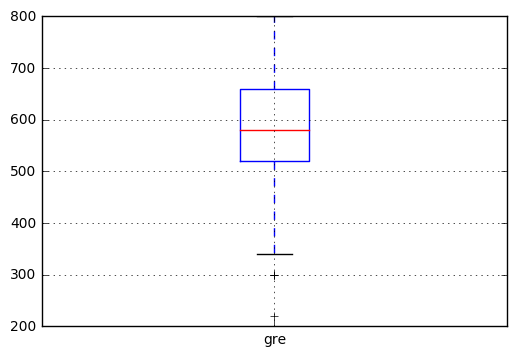

In [34]:
df_raw.boxplot(column = 'gre')

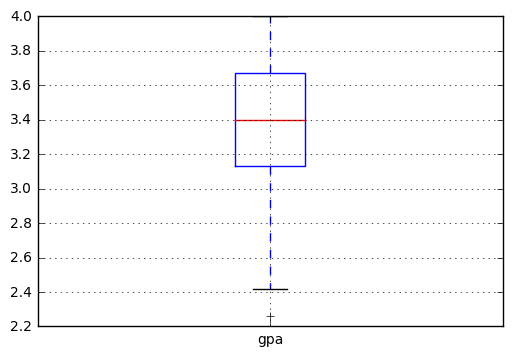

In [35]:
df_raw.boxplot(column = 'gpa')

#### Question 7. What do this plots show?

Answer: The box plots show the min value, max value (whiskers) and interquartile range (box) of the data. The measure of center is the median.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d17ca90>]], dtype=object)

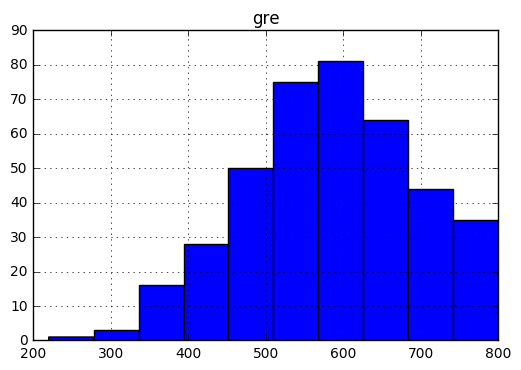

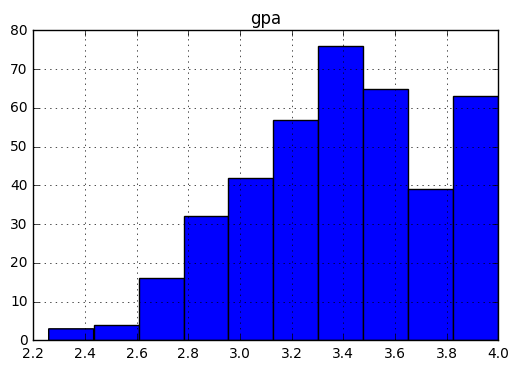

In [40]:
# plot the distribution of each variable 
#df_raw.plot.bar(column = 'gpa')

df_raw.hist(column = 'gre')
df_raw.hist(column = 'gpa')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, both distributions are skewed left.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


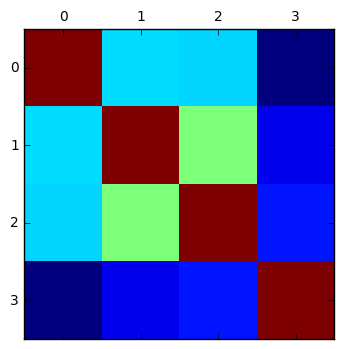

In [68]:
# create a correlation matrix for the data

print df_raw.corr(method='pearson')
plt.matshow(df_raw.corr())

#### Question 12. What did you find?

Answer: There doesn't appear to be excessive colinearity between any of the predictor variables. The highest correlation coefficient is between gpa and gre, and it's only 0.38

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We can run regression on all 3 predictor variables (gre, gpa, and prestige) in order to understand the true correlation coefficient between the prestige of the undergraduate university and the rate of admittance. 

All we're really interested in are the beta coefficients for each predictor variable, but since the outcome variable is binary, logistic regression seems more appropriate than linear regression. See below for both methods:


In [85]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

feature_cols = ['gre', 'gpa', 'prestige']
X = df_raw[feature_cols]
y = df_raw['admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))


-0.267140029057
[ 0.00065525  0.15523553 -0.12010302]


[('gre', 0.00065525020835143118),
 ('gpa', 0.15523553017649744),
 ('prestige', -0.12010302125040205)]

In [88]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

X = df_raw[feature_cols]
y = df_raw['admit']

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

# fit the model with data
logreg.fit(X, y)

print(feature_cols)
print(logreg.coef_)

['gre', 'gpa', 'prestige']
[[ 0.00188044  0.22409832 -0.59792487]]


#### Question 14. What is your hypothesis? 

Answer: Prior to analysis, my hypothesis would have been that prestige and admittance rate were postively correlated, but apparently the correlation is negative. It's possible that there are other lurking variables not included in the data set that could explain this apparent negative correlation. Prestige also appears negatively correlated with both GRE and GPA, which does not make intuitive sense.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data